In [1]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from helper_functions import *
from PSO_preprocessing import strip_skull_PSO, preprocess

np.random.seed(101)

2025-01-04 18:57:51.769256: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-04 18:57:51.778827: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736013471.789576   46116 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736013471.793049   46116 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-04 18:57:51.805740: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Load data
X, y = load_data(preproces = False)
X.shape, y.shape

Data is loaded.


((639, 240, 240, 3), (639, 1))

In [ ]:
def lw_cnn(input_shape=(240, 240, 1)):
    '''
        Lightweight cnn with only one Conv layer.
    '''
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((511, 240, 240, 3), (511, 1), (128, 240, 240, 3), (128, 1))

/home/jan/MT/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1736013475.962111   46116 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5652 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Data shapes: (511, 240, 240, 3), (511, 1)


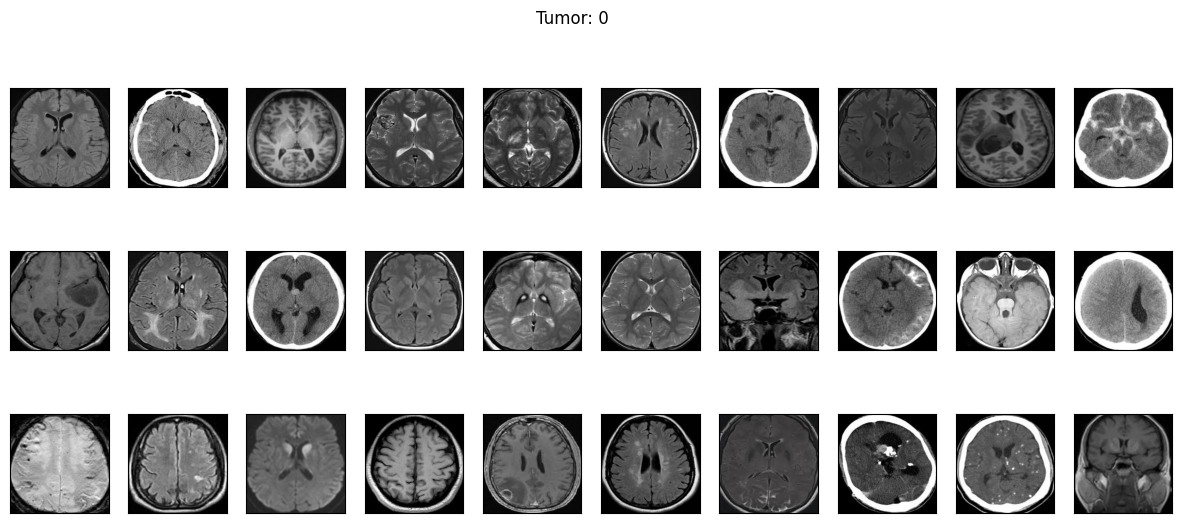

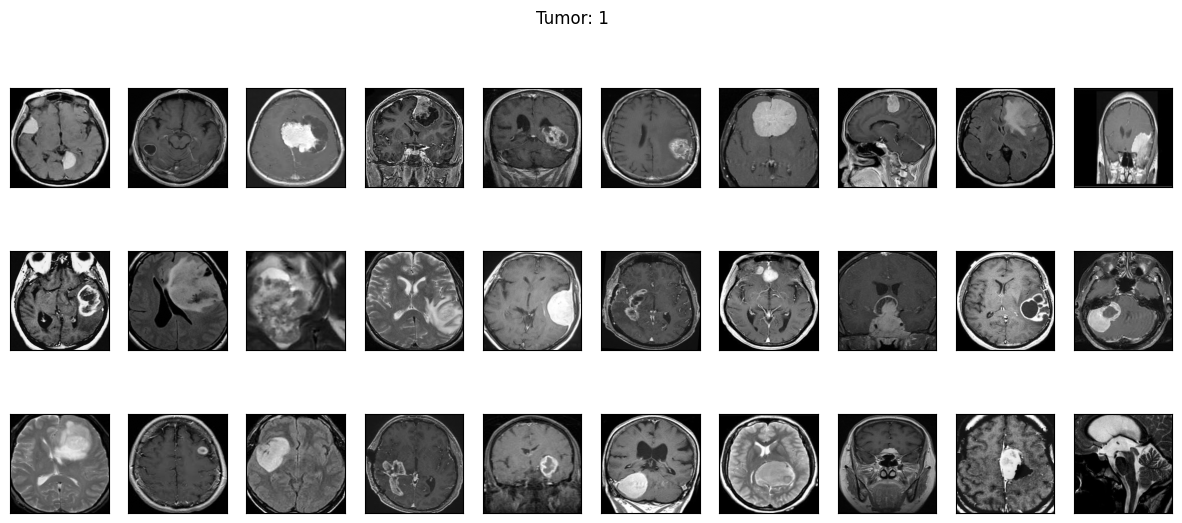

Model info:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 453152)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       453,153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,049 (1.73 MB)

 Trainable params: 454,049 (1.73 MB)

 Non-trainable params: 0 (0.00 B)


Fitting the model...
Epoch 1/18


I0000 00:00:1736013478.253990   46212 service.cc:148] XLA service 0x71636c003920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736013478.254019   46212 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-01-04 18:57:58.271261: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1736013478.338203   46212 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7240 - loss: 4.5581

I0000 00:00:1736013480.457212   46212 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.5468 - loss: 4.9591 - val_accuracy: 0.7308 - val_loss: 1.4998
Epoch 2/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7167 - loss: 1.0110 - val_accuracy: 0.8462 - val_loss: 0.5950
Epoch 3/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7844 - loss: 0.4931 - val_accuracy: 0.8077 - val_loss: 0.4175
Epoch 4/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8373 - loss: 0.3799 - val_accuracy: 0.8846 - val_loss: 0.3398
Epoch 5/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9327 - loss: 0.2539 - val_accuracy: 0.8269 - val_loss: 0.3052
Epoch 6/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9644 - loss: 0.1550 - val_accuracy: 0.8846 - val_loss: 0.2854
Epoch 7/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9876 - loss: 0.0950 - val_accuracy: 0.8846 - val_loss: 0.2512
Epoch 8/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9965 - loss: 0.0539 - val_accuracy: 0.9231 - val_loss: 0

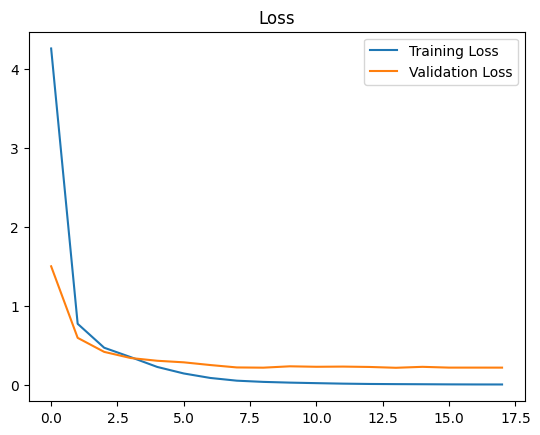

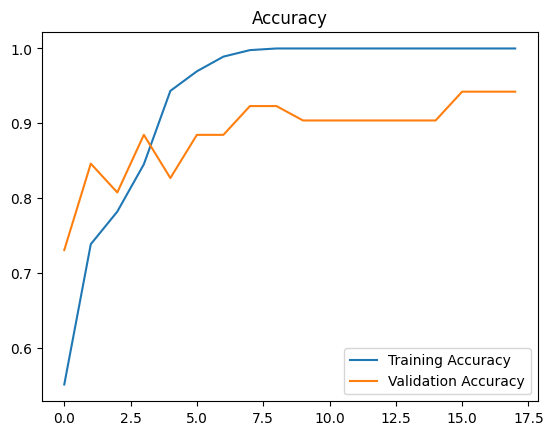

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
accuracy = 0.86
f1 score = 0.90


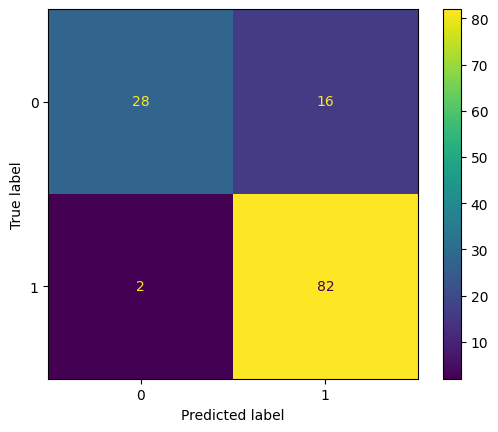

(0.859375, np.float64(0.9010989010989011))

In [6]:
# without preprocessing, colored images
model = lw_cnn(input_shape=(240,240,3))
train(model, X_train, y_train, X_test, y_test, epochs=18, verbose=True)

In [7]:
def turn2gray(img):
  normalized = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
  img = normalized.astype(np.uint8)
  if len(img.shape) == 3 and img.shape[2] == 3:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  else:
    gray = img

  gray = cv2.GaussianBlur(gray, (5, 5), 0)
  return gray

/home/jan/MT/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(511, 240, 240)
Data shapes: (511, 240, 240), (511, 1)


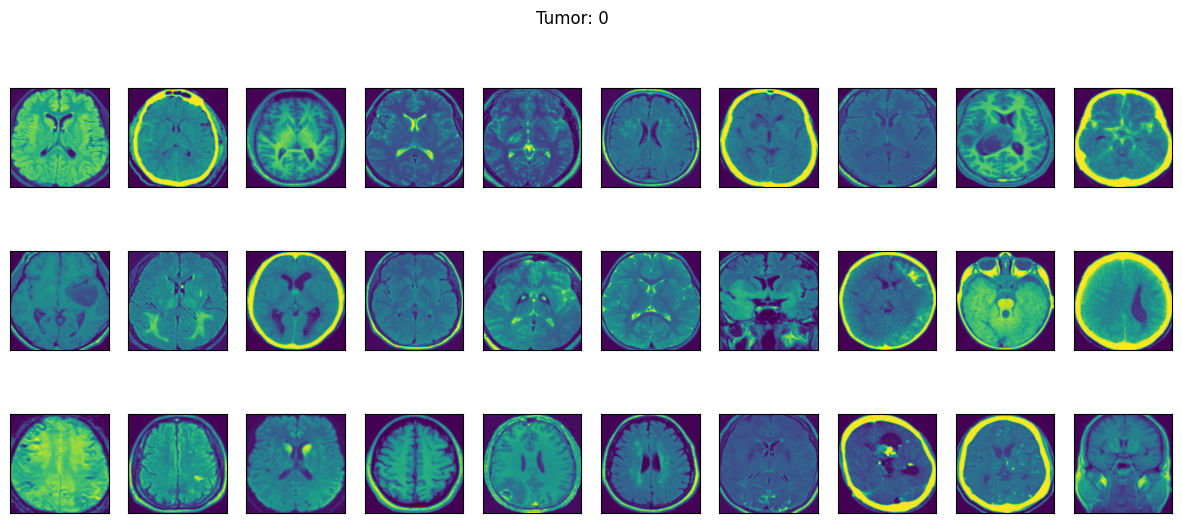

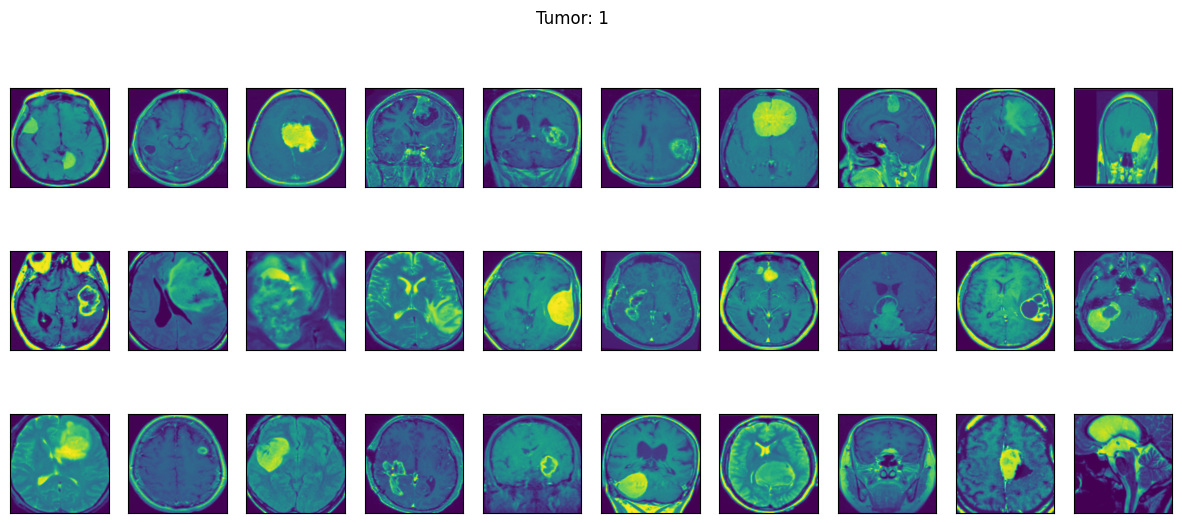

Model info:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 238, 238, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 453152)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       453,153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 453,473 (1.73 MB)

 Trainable params: 453,473 (1.73 MB)

 Non-trainable params: 0 (0.00 B)


Fitting the model...
Epoch 1/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.5730 - loss: 373.1716 - val_accuracy: 0.7115 - val_loss: 18.1092
Epoch 2/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6718 - loss: 21.0345 - val_accuracy: 0.7692 - val_loss: 12.3798
Epoch 3/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8104 - loss: 9.1156 - val_accuracy: 0.6731 - val_loss: 12.2702
Epoch 4/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8843 - loss: 2.9438 - val_accuracy: 0.8269 - val_loss: 5.7301
Epoch 5/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9188 - loss: 2.2186 - val_accuracy: 0.8462 - val_loss: 4.4122
Epoch 6/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8949 - loss: 2.6526 - val_accuracy: 0.6731 - val_loss: 17.5883
Epoch 7/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8573 - loss: 3.9186 - val_accuracy: 0.8077 - val_loss: 16.0431
Epoch 8/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9183 - loss: 1.

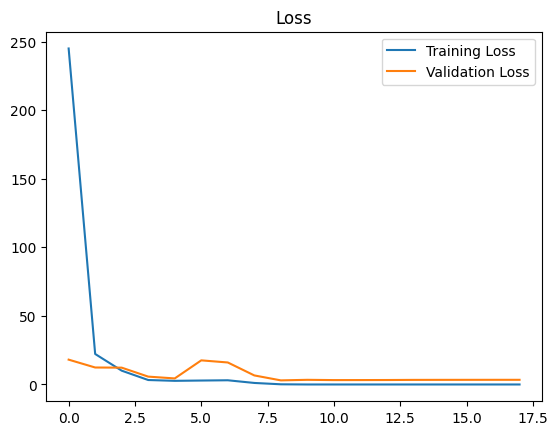

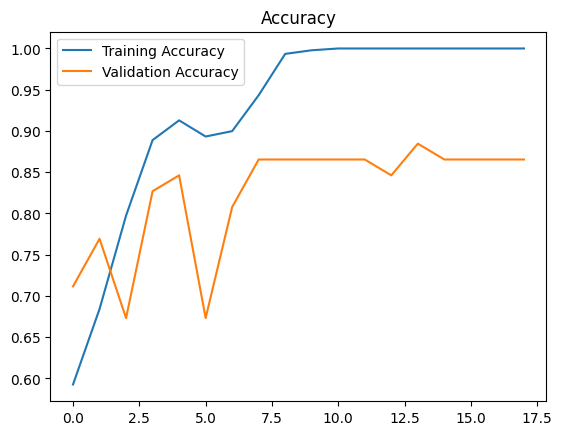

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
accuracy = 0.84
f1 score = 0.89


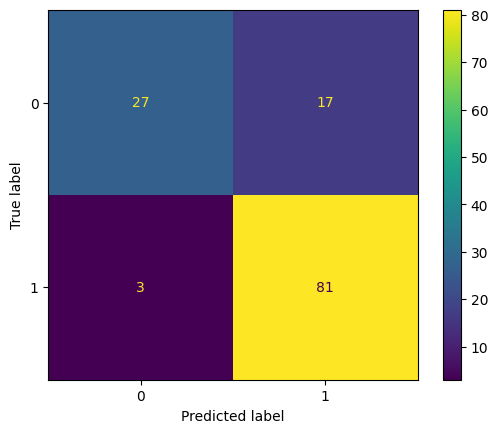

(0.84375, np.float64(0.8901098901098901))

In [8]:
# without preprocessing, gray images
model2 = lw_cnn(input_shape=(240,240,1))
X_train_p = np.array([turn2gray(img) for img in X_train])
X_test_p = np.array([turn2gray(img) for img in X_test])
print(X_train_p.shape)
train(model2, X_train_p, y_train, X_test_p, y_test, epochs=18, verbose=True)

/home/jan/MT/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
100%|██████████| 128/128 [00:00<00:00, 1109.27it/s]


Data shapes: (511, 240, 240, 3), (511, 1)


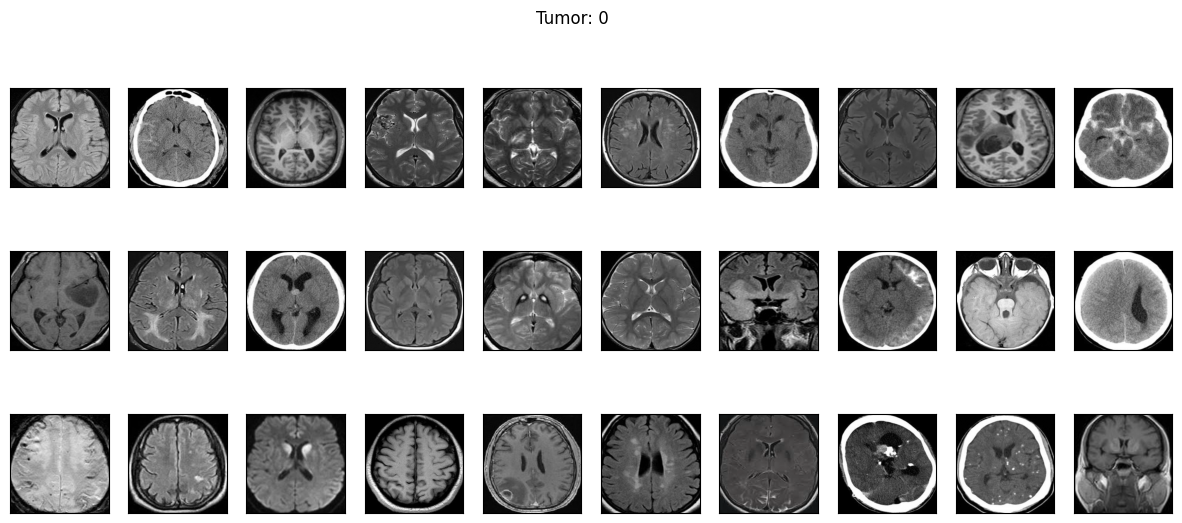

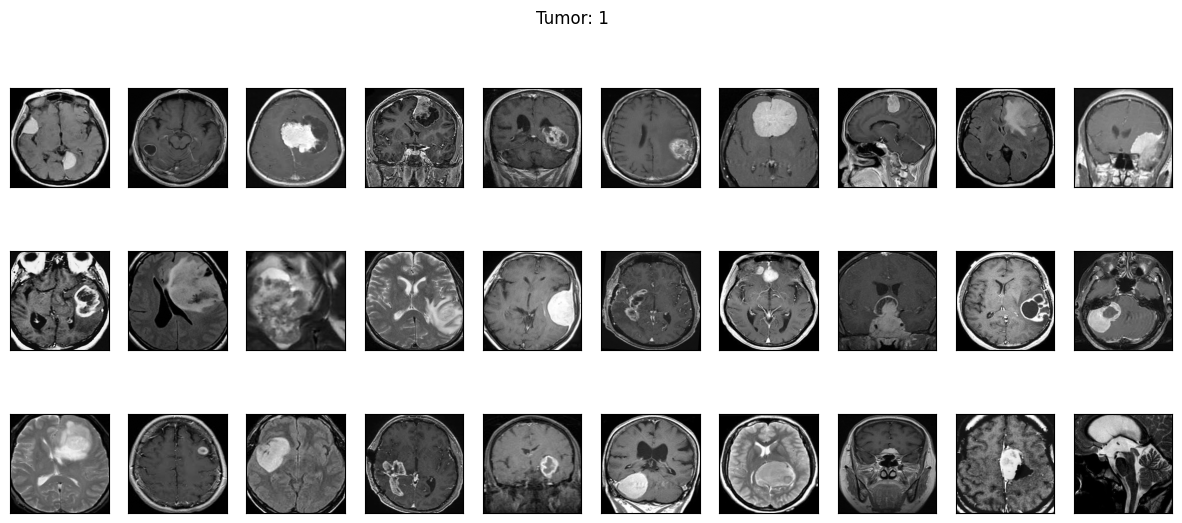

Model info:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 453152)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │       453,153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,049 (1.73 MB)

 Trainable params: 454,049 (1.73 MB)

 Non-trainable params: 0 (0.00 B)


Fitting the model...
Epoch 1/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6126 - loss: 4.8249 - val_accuracy: 0.3846 - val_loss: 1.4026
Epoch 2/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5807 - loss: 0.9774 - val_accuracy: 0.7885 - val_loss: 0.4747
Epoch 3/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7876 - loss: 0.4022 - val_accuracy: 0.8846 - val_loss: 0.3301
Epoch 4/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9321 - loss: 0.2597 - val_accuracy: 0.9423 - val_loss: 0.2815
Epoch 5/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9532 - loss: 0.1566 - val_accuracy: 0.9423 - val_loss: 0.2514
Epoch 6/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9945 - loss: 0.0864 - val_accuracy: 0.8269 - val_loss: 0.3410
Epoch 7/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0605 - val_accuracy: 0.9423 - val_loss: 0.2348
Epoch 8/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9970 - loss: 0.0337 - va

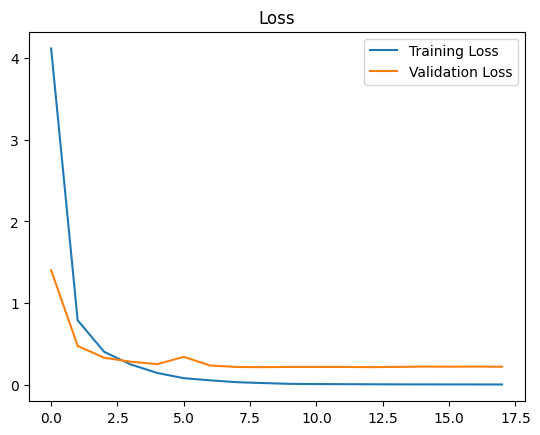

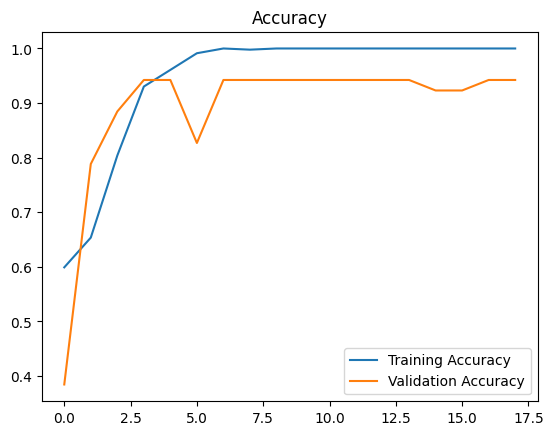

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
accuracy = 0.88
f1 score = 0.92


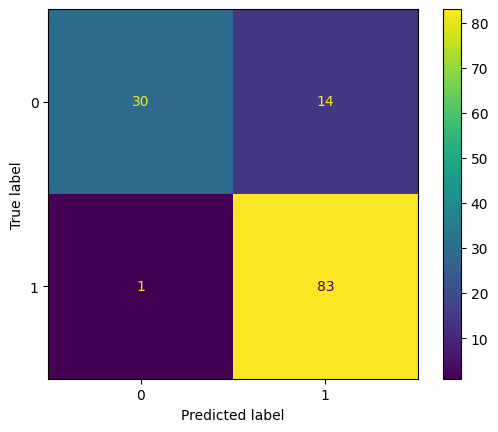

(0.8828125, np.float64(0.9171270718232044))

In [9]:
# with preprocessing
model3 = lw_cnn(input_shape=(240,240,3))
X_train_p = preprocess(X_train)
X_test_p = preprocess(X_test)
train(model3, X_train_p, y_train, X_test_p, y_test, epochs=18, verbose=True)

/home/jan/MT/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
 91%|█████████ | 465/511 [18:39<01:50,  2.41s/it]/home/jan/MT/PSO_preprocessing.py:126: RuntimeWarning: divide by zero encountered in log
  fitness = np.log(image_entropy * edge_intensity * edges_count)
100%|██████████| 128/128 [05:10<00:00,  2.42s/it]


Data shapes: (511, 240, 240, 3), (511, 1)


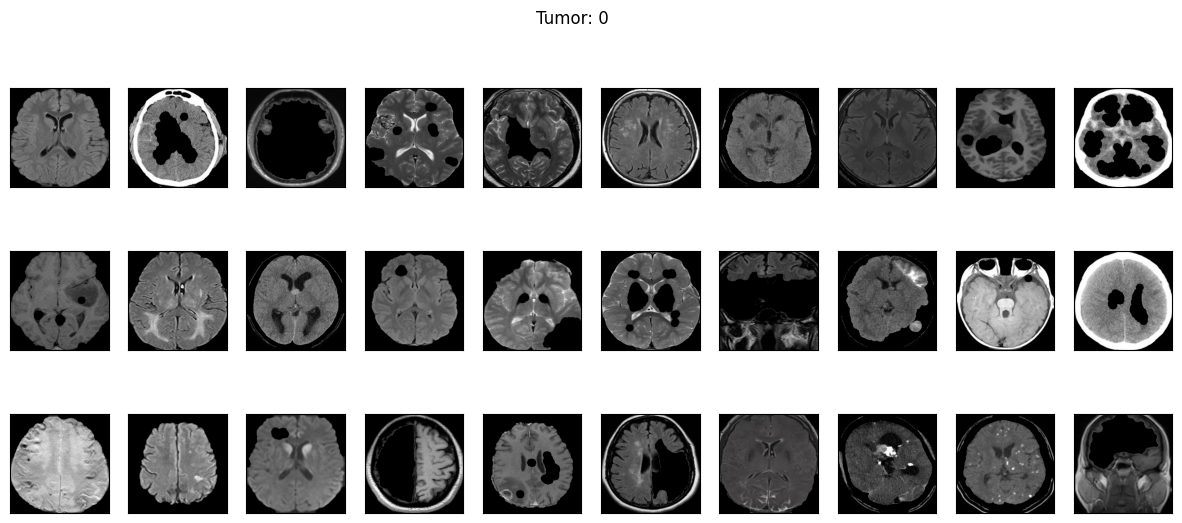

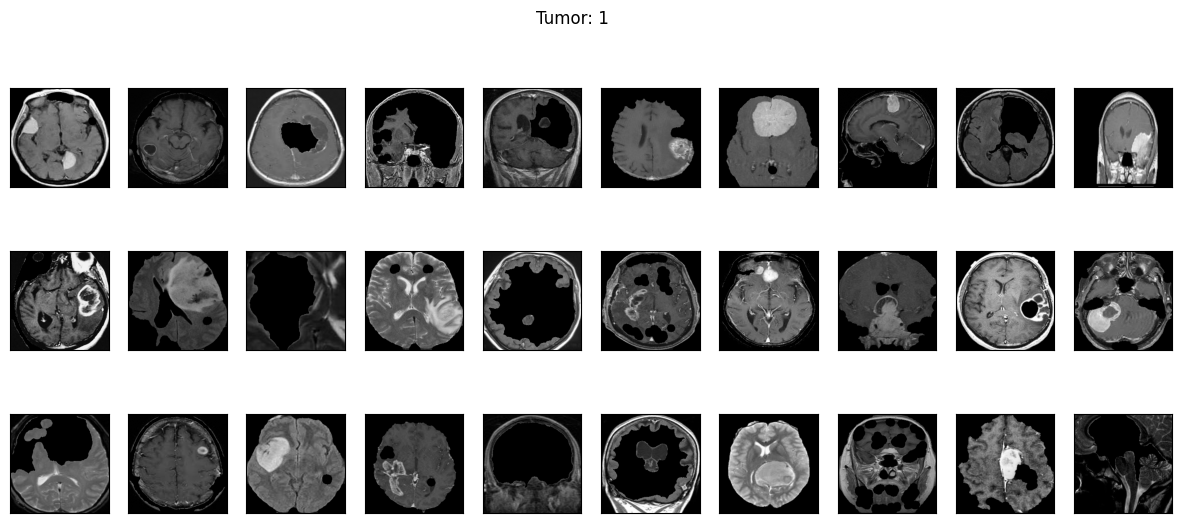

Model info:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 453152)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │       453,153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,049 (1.73 MB)

 Trainable params: 454,049 (1.73 MB)

 Non-trainable params: 0 (0.00 B)


Fitting the model...
Epoch 1/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5117 - loss: 3.3456 - val_accuracy: 0.6538 - val_loss: 0.7295
Epoch 2/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6904 - loss: 0.9728 - val_accuracy: 0.6538 - val_loss: 0.6272
Epoch 3/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7913 - loss: 0.4271 - val_accuracy: 0.9038 - val_loss: 0.3948
Epoch 4/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9353 - loss: 0.2578 - val_accuracy: 0.9231 - val_loss: 0.3114
Epoch 5/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9843 - loss: 0.1611 - val_accuracy: 0.8077 - val_loss: 0.3654
Epoch 6/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9993 - loss: 0.1083 - val_accuracy: 0.9038 - val_loss: 0.3005
Epoch 7/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9993 - loss: 0.0590 - val_accuracy: 0.9038 - val_loss: 0.2806
Epoch 8/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0454 - va

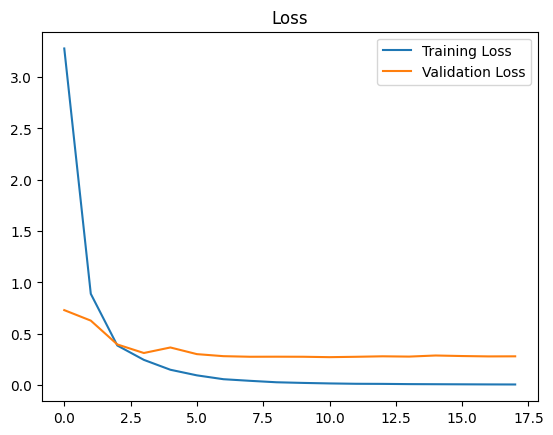

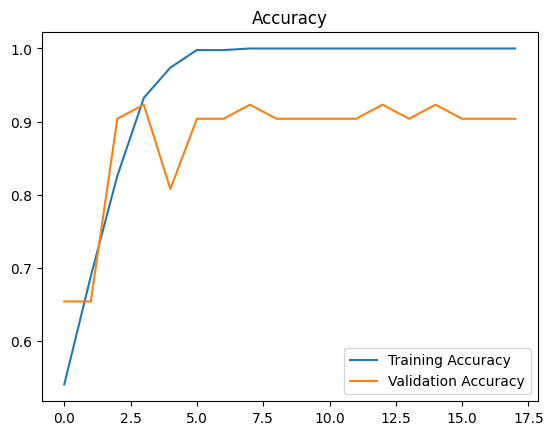

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
accuracy = 0.78
f1 score = 0.85


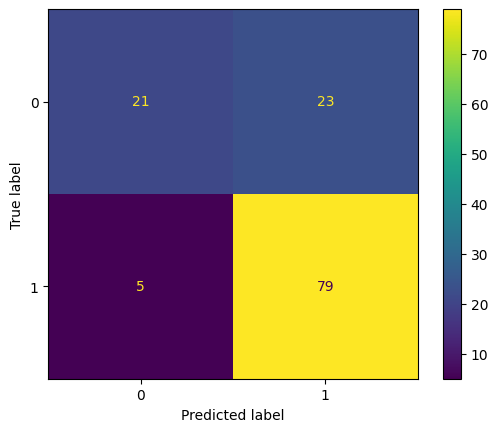

(0.78125, np.float64(0.8494623655913979))

In [10]:
# with PSO preprocessing
model4 = lw_cnn(input_shape=(240,240,3))
X_train_p = strip_skull_PSO(X_train)
X_test_p = strip_skull_PSO(X_test)
train(model4, X_train_p, y_train, X_test_p, y_test, epochs=18, verbose=True)

/home/jan/MT/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
 91%|█████████ | 465/511 [18:31<01:49,  2.37s/it]/home/jan/MT/PSO_preprocessing.py:126: RuntimeWarning: divide by zero encountered in log
  fitness = np.log(image_entropy * edge_intensity * edges_count)
100%|██████████| 128/128 [05:12<00:00,  2.44s/it]


Data shapes: (511, 240, 240, 3), (511, 1)


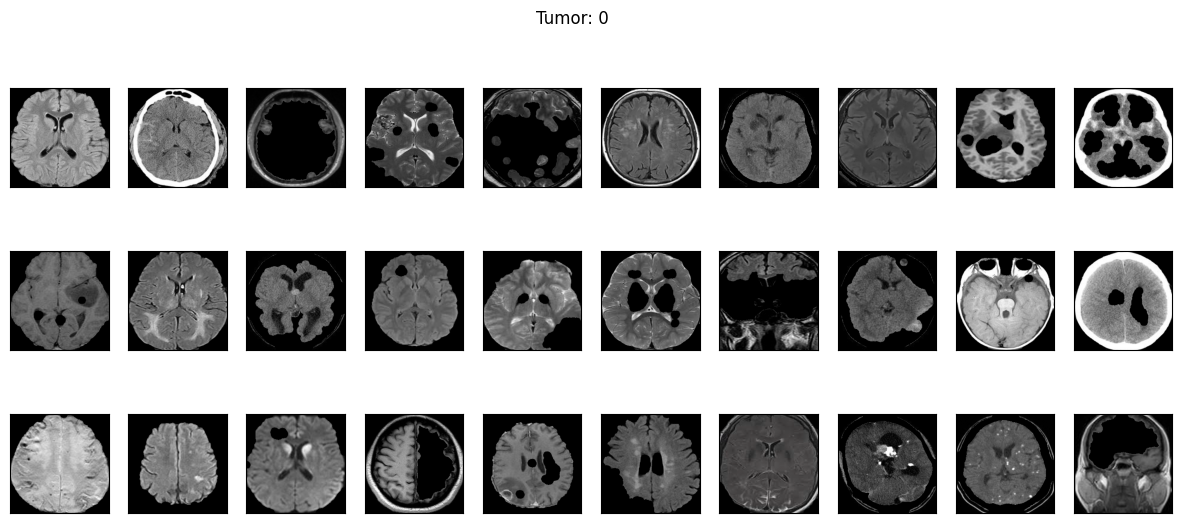

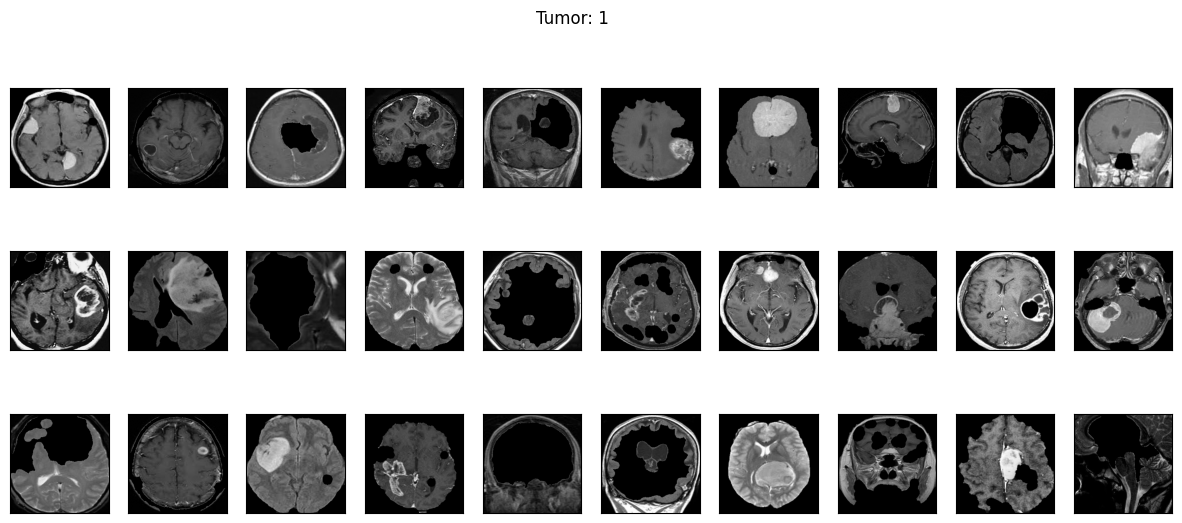

Model info:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 453152)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │       453,153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,049 (1.73 MB)

 Trainable params: 454,049 (1.73 MB)

 Non-trainable params: 0 (0.00 B)


Fitting the model...
Epoch 1/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.5687 - loss: 1.6789 - val_accuracy: 0.5577 - val_loss: 0.7711
Epoch 2/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7003 - loss: 0.5317 - val_accuracy: 0.9231 - val_loss: 0.3587
Epoch 3/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9154 - loss: 0.2710 - val_accuracy: 0.9038 - val_loss: 0.2827
Epoch 4/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9594 - loss: 0.1287 - val_accuracy: 0.9423 - val_loss: 0.2624
Epoch 5/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0642 - val_accuracy: 0.8846 - val_loss: 0.2757
Epoch 6/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0324 - val_accuracy: 0.9423 - val_loss: 0.2784
Epoch 7/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 0.9423 - val_loss: 0.2975
Epoch 8/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0110 - va

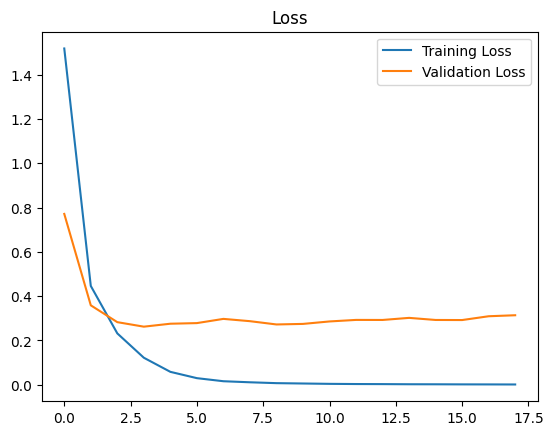

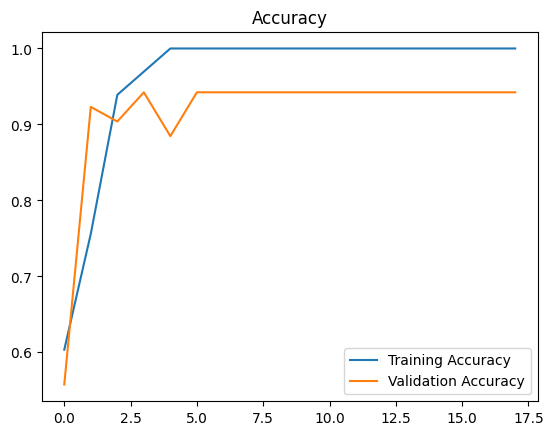

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
accuracy = 0.80
f1 score = 0.86


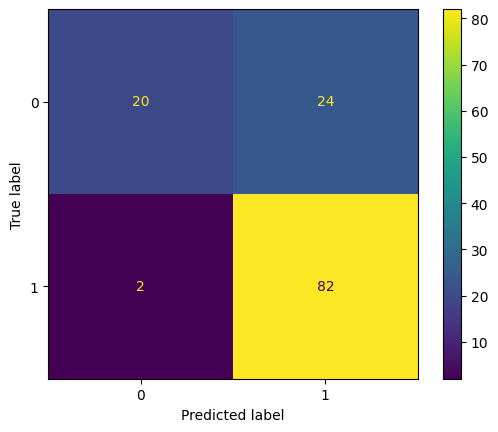

(0.796875, np.float64(0.8631578947368421))

In [11]:
# mixed approach, first do preprocessing, and then PSO preprocessing

model5 = lw_cnn(input_shape=(240,240,3))
X_train_p = strip_skull_PSO(preprocess(X_train))
X_test_p = strip_skull_PSO(preprocess(X_test))
train(model5, X_train_p, y_train, X_test_p, y_test, epochs=18, verbose=True)

/home/jan/MT/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
 91%|█████████ | 465/511 [18:53<01:50,  2.40s/it]/home/jan/MT/PSO_preprocessing.py:126: RuntimeWarning: divide by zero encountered in log
  fitness = np.log(image_entropy * edge_intensity * edges_count)
100%|██████████| 128/128 [00:00<00:00, 1162.82it/s]


Data shapes: (511, 240, 240, 3), (511, 1)


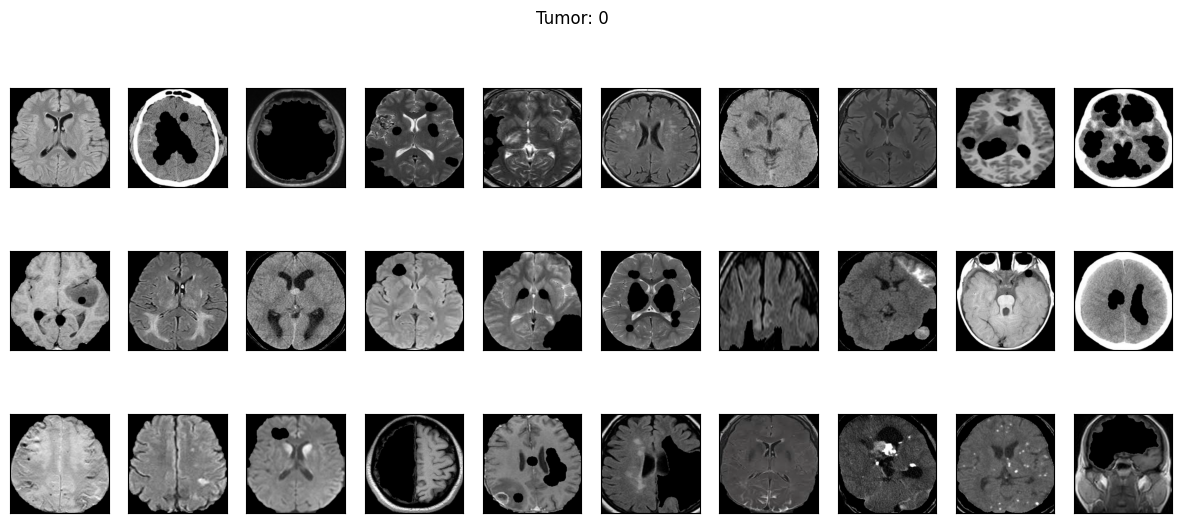

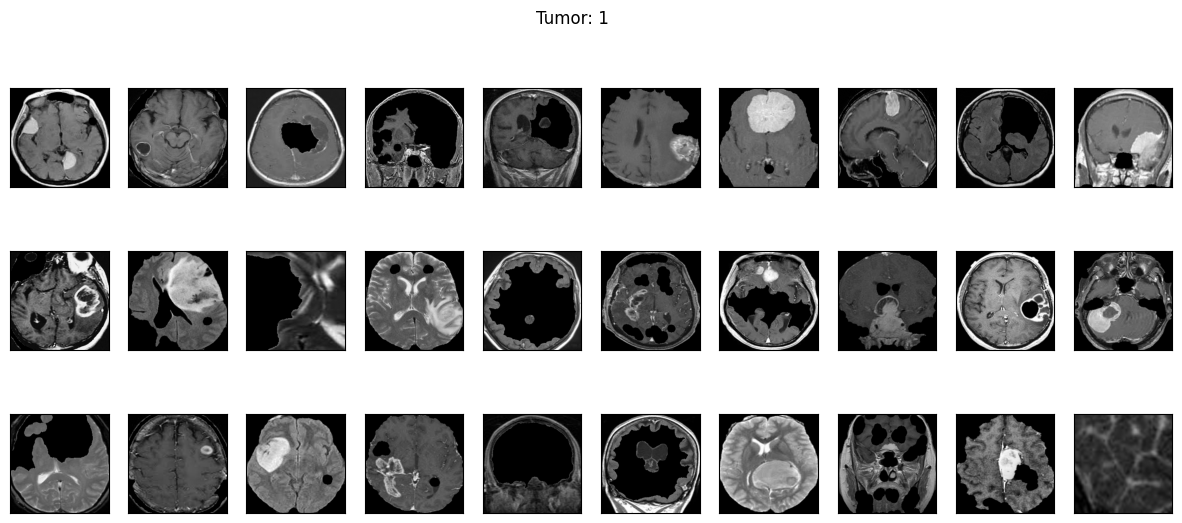

Model info:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 453152)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │       453,153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,049 (1.73 MB)

 Trainable params: 454,049 (1.73 MB)

 Non-trainable params: 0 (0.00 B)


Fitting the model...
Epoch 1/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5573 - loss: 3.2460 - val_accuracy: 0.6346 - val_loss: 0.6770
Epoch 2/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5839 - loss: 0.7012 - val_accuracy: 0.7500 - val_loss: 0.5477
Epoch 3/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7984 - loss: 0.3897 - val_accuracy: 0.8077 - val_loss: 0.4555
Epoch 4/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8941 - loss: 0.2585 - val_accuracy: 0.8269 - val_loss: 0.3596
Epoch 5/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9865 - loss: 0.1278 - val_accuracy: 0.8269 - val_loss: 0.3619
Epoch 6/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9961 - loss: 0.0721 - val_accuracy: 0.8462 - val_loss: 0.3730
Epoch 7/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0359 - val_accuracy: 0.8269 - val_loss: 0.3818
Epoch 8/18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0173 - va

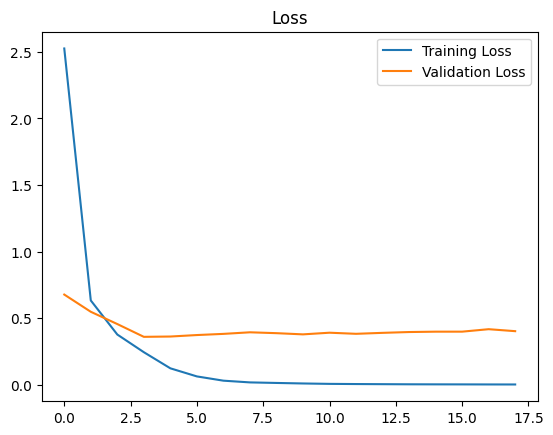

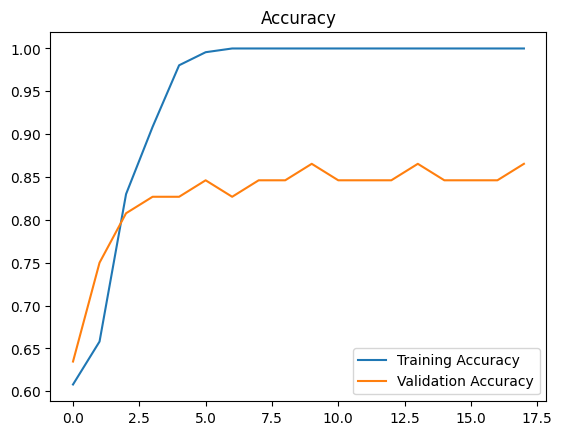

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
accuracy = 0.80
f1 score = 0.86


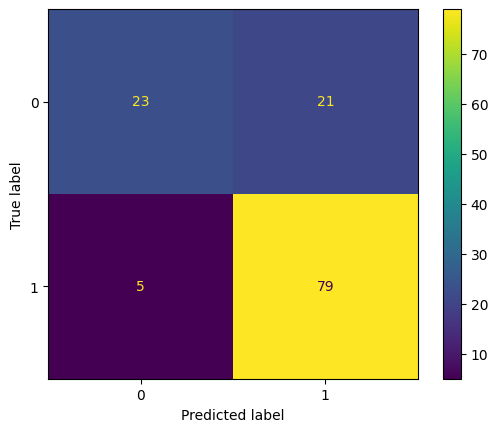

(0.796875, np.float64(0.8586956521739131))

In [12]:
model6 = lw_cnn(input_shape=(240,240,3))
X_train_p = preprocess(strip_skull_PSO(X_train))
X_test_p = preprocess(strip_skull_PSO(X_test))
train(model6, X_train_p, y_train, X_test_p, y_test, epochs=18, verbose=True)